In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz

# Column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin',
             'bmi', 'pedigree', 'age', 'label']

# Load dataset properly (use header=0, NOT header=None)
pima = pd.read_csv("diabetes.csv", names=col_names, header=0)

# Show first 5 rows
print(pima.head())


   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [2]:
# Define Features and Target
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]
y = pima['label']

# Convert all features to numeric in case there are any stray strings
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  # Replace missing values with 0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Default RF Accuracy: 0.7792207792207793


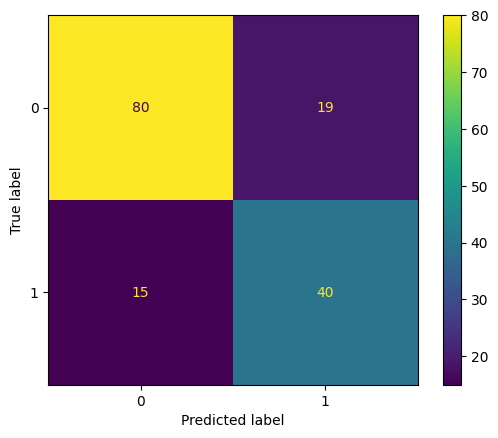

In [3]:
# Train Random Forest (default parameters)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Default RF Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


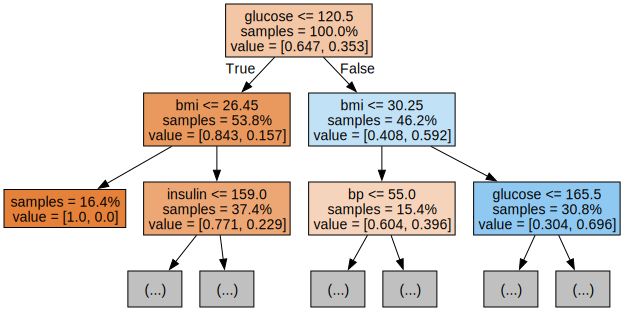

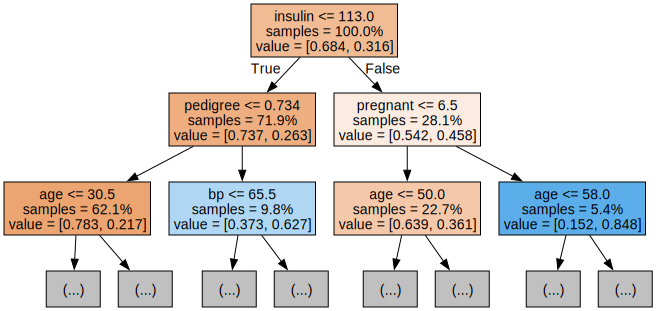

In [4]:
import graphviz
from sklearn.tree import export_graphviz

# Visualize first 2 trees in the forest
for i in range(2):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


In [5]:
# Hyperparameter tuning using RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier(random_state=42)

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions=param_dist, 
                                 n_iter=5, 
                                 cv=5,
                                 random_state=42)

rand_search.fit(X_train, y_train)

# Best model
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 238}


Tuned RF Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727


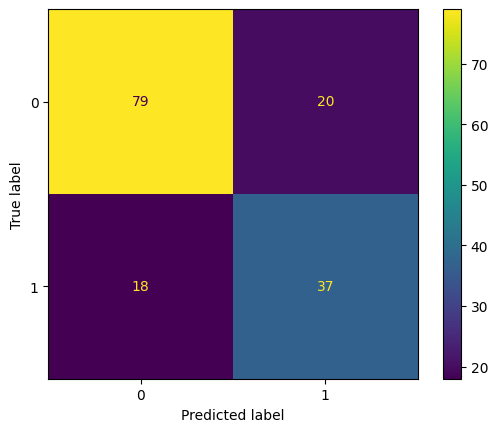

In [6]:
# Predictions with best model
y_pred = best_rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Tuned RF Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

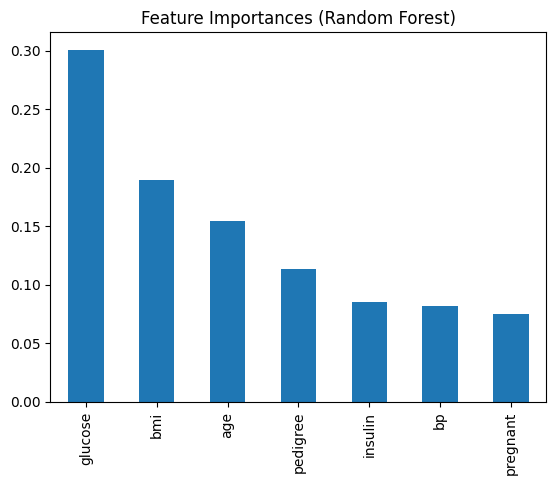

In [7]:
# Feature Importance
feature_importances = pd.Series(best_rf.feature_importances_, 
                                index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar(title="Feature Importances (Random Forest)");